In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("../survey/Usability_Testing_of_KU_elf_system_elf_ku_edu_np_ (1).csv")
df.head()

,Response,Submitted on:,Institution,Department,Course,Group,ID,Full name,Username,"Q01_1->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q02_2->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q03_3->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q04_4->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q05_5->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q06_6->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q07_7->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q08_8->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q09_9->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q10_10->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree"
0,746,24/07/2020 13:49:12,NaN,NaN,COMP 341: Human Computer Interaction,NaN,148,Rikesh Karmacharya,aslan,3,3,2,1,4,2,3,2,3,1
1,875,15/08/2020 17:33:37,NaN,NaN,COMP 341: Human Computer Interaction,NaN,442,Bibhusan Baral,bibhusan,4,3,4,2,4,4,4,3,2,2
2,848,7/8/2020 8:34,NaN,NaN,COMP 341: Human Computer Interaction,NaN,473,Satyam Karki,blackhammer,4,2,4,2,4,2,4,3,4,2
3,849,7/8/2020 11:50,NaN,NaN,COMP 341: Human Computer Interaction,NaN,478,Shubh Raj Dhital,shubh,5,2,5,1,5,2,4,2,5,2
4,779,24/07/2020 13:51:18,NaN,NaN,COMP 341: Human Computer Interaction,NaN,525,Roshan Shreesh,shreesh.rosan,3,1,4,1,4,4,3,1,4,2


In [6]:
df=df.drop(df.columns[[0,1,2,3,4,5,8]],axis=1)
# df.head()

index=2
for i in range(index,len(df.columns)):
    df.columns.values[i]=f"Q{i-1}"

df.head()


,ID,Full name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,148,Rikesh Karmacharya,3,3,2,1,4,2,3,2,3,1
1,442,Bibhusan Baral,4,3,4,2,4,4,4,3,2,2
2,473,Satyam Karki,4,2,4,2,4,2,4,3,4,2
3,478,Shubh Raj Dhital,5,2,5,1,5,2,4,2,5,2
4,525,Roshan Shreesh,3,1,4,1,4,4,3,1,4,2


In [7]:
inversion=[2,4,6,8,10]

def invert_score(x):
    if x==1:return 5
    if x==2:return 4
    if x==3:return 3
    if x==4:return 2
    if x==5:return 1

for i in inversion :
    df.iloc[:,i+1]=df.iloc[:,i+1].apply(invert_score)

df.head()

,ID,Full name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,148,Rikesh Karmacharya,3,3,2,5,4,4,3,4,3,5
1,442,Bibhusan Baral,4,3,4,4,4,2,4,3,2,4
2,473,Satyam Karki,4,4,4,4,4,4,4,3,4,4
3,478,Shubh Raj Dhital,5,4,5,5,5,4,4,4,5,4
4,525,Roshan Shreesh,3,5,4,5,4,2,3,5,4,4


In [8]:
df["score"]=df.iloc[:,2:11].mean(axis=1)
df["round"]=df["score"].apply(lambda x: round(x))
df.head()

,ID,Full name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,score,round
0,148,Rikesh Karmacharya,3,3,2,5,4,4,3,4,3,5,3.444444,3
1,442,Bibhusan Baral,4,3,4,4,4,2,4,3,2,4,3.333333,3
2,473,Satyam Karki,4,4,4,4,4,4,4,3,4,4,3.888889,4
3,478,Shubh Raj Dhital,5,4,5,5,5,4,4,4,5,4,4.555556,5
4,525,Roshan Shreesh,3,5,4,5,4,2,3,5,4,4,3.888889,4


<AxesSubplot:xlabel='score', ylabel='Density'>

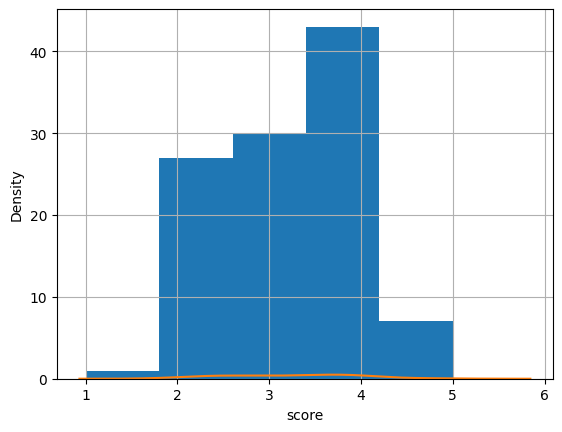

In [9]:
import matplotlib as plt
import seaborn as sns

df["score"].hist(bins=5,range=(1,5))
sns.kdeplot(df['score'],label="Density")


<AxesSubplot:xlabel='score', ylabel='Density'>

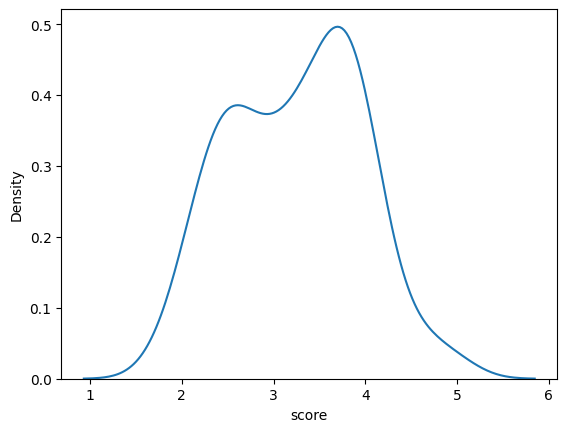

In [10]:
sns.kdeplot(df['score'],label="Density")

In [12]:
modified_df = df[['ID','Full name','score']]
modified_df

,ID,Full name,score
0,148,Rikesh Karmacharya,3.444444
1,442,Bibhusan Baral,3.333333
2,473,Satyam Karki,3.888889
3,478,Shubh Raj Dhital,4.555556
4,525,Roshan Shreesh,3.888889
...,...,...,...
103,2255,Minusha Gurung,3.555556
104,2256,Pratik Khadka,3.777778
105,2257,Niraj Tamang,3.000000
106,2258,Bishal Shah,2.444444


In [13]:
modified_df.to_csv('../modified_data/elf.csv')